**Prediction using Decision Tree**
Algorithm
(Level - Intermediate)

● Create the Decision Tree classifier and visualize it graphically.<br>
● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.<br>
● Dataset : https://bit.ly/3kXTdox<br>

In [80]:
# importing alll the necessary packages to use the various classification algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [3]:
#upload the iris dataset
from google.colab import files 
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [11]:
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
#inport the dataset from  sklearn datasets
import sklearn.datasets as datasets
iris = datasets.load_iris()

# Forming the iris dataframe
df2=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
df.shape

(150, 6)

In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [21]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

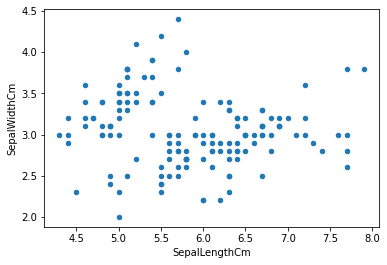

In [26]:
df.plot(kind =  'scatter' ,  x = "SepalLengthCm", y = "SepalWidthCm")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


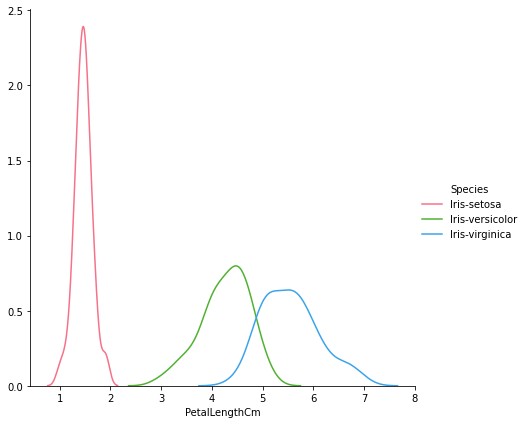

In [57]:
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


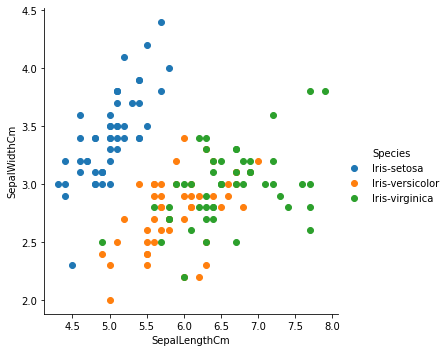

In [38]:
#Add Colors
sns.FacetGrid(df ,hue='Species', size=5) .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') .add_legend()

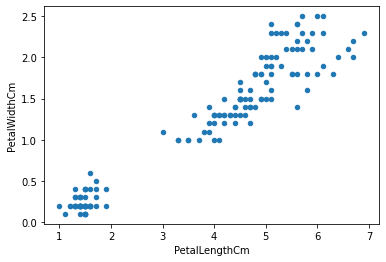

In [24]:
df.plot(kind = 'scatter' ,  x = "PetalLengthCm", y = "PetalWidthCm")

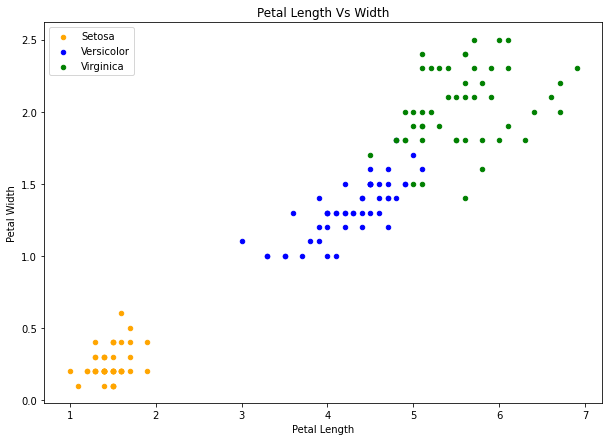

In [27]:
#add colors
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

**# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure. https://seaborn.pydata.org/generated/seaborn.jointplot.html**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


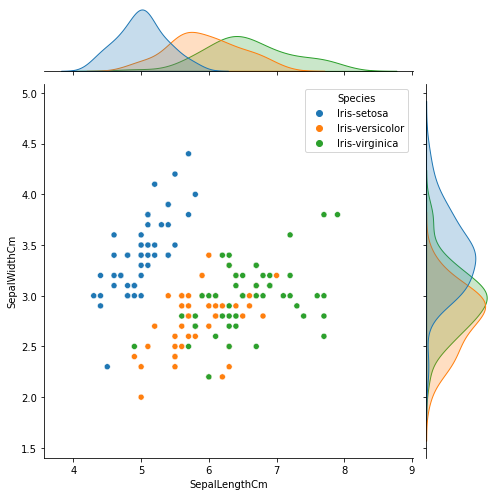

In [29]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=df, hue = 'Species' , size=7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


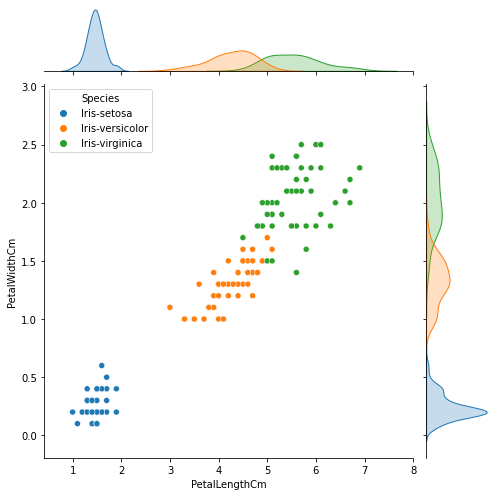

In [31]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm', data=df, hue = 'Species' , size=7)

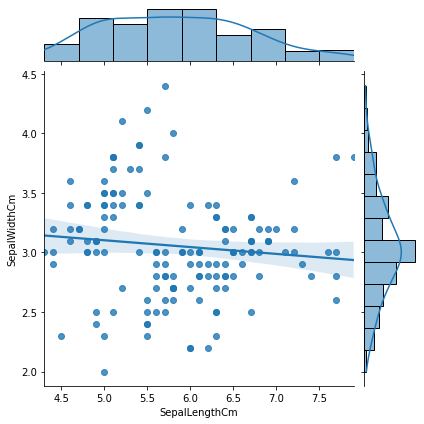

In [35]:
sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", kind="reg")

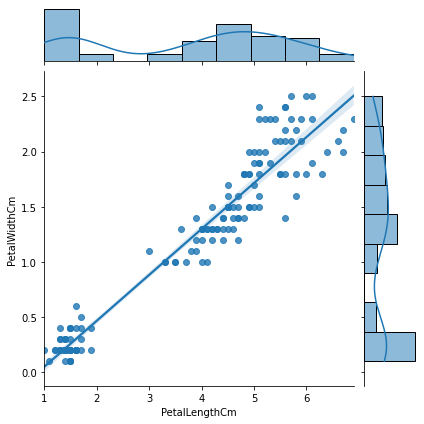

In [36]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm' , data = df , kind="reg")

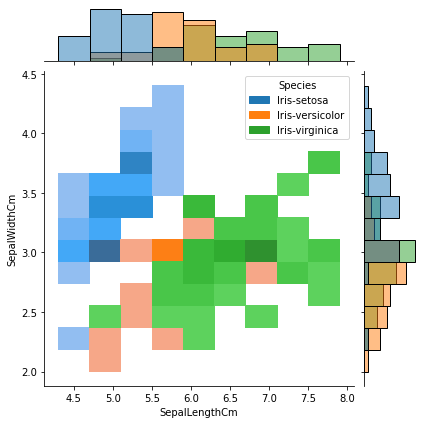

In [55]:
sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", kind="hist")

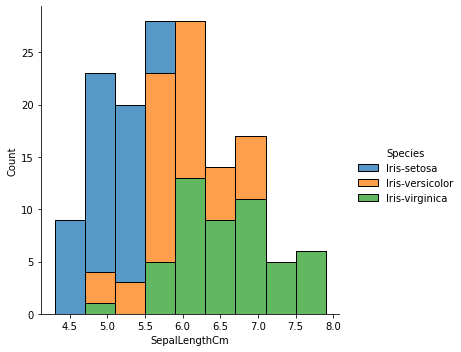

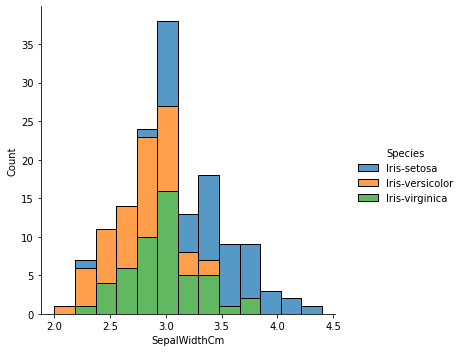

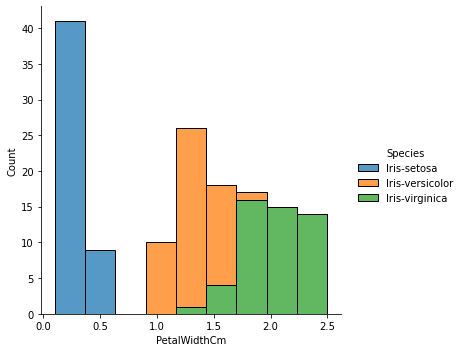

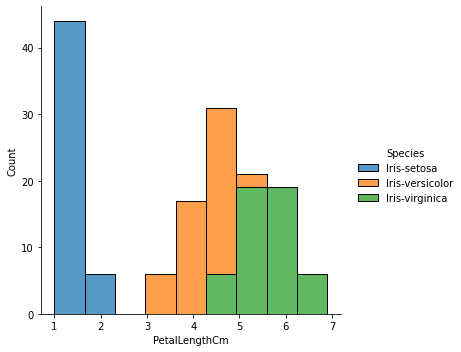

In [46]:
#sns.displot(data=df, x="SepalLengthCm", hue="Species", multiple="stack" , kind="kde")
sns.displot(data=df, x="SepalLengthCm", hue="Species", multiple="stack")
sns.displot(data=df, x="SepalWidthCm", hue="Species", multiple="stack")
sns.displot(data=df, x="PetalWidthCm", hue="Species", multiple="stack")
sns.displot(data=df, x="PetalLengthCm", hue="Species", multiple="stack")


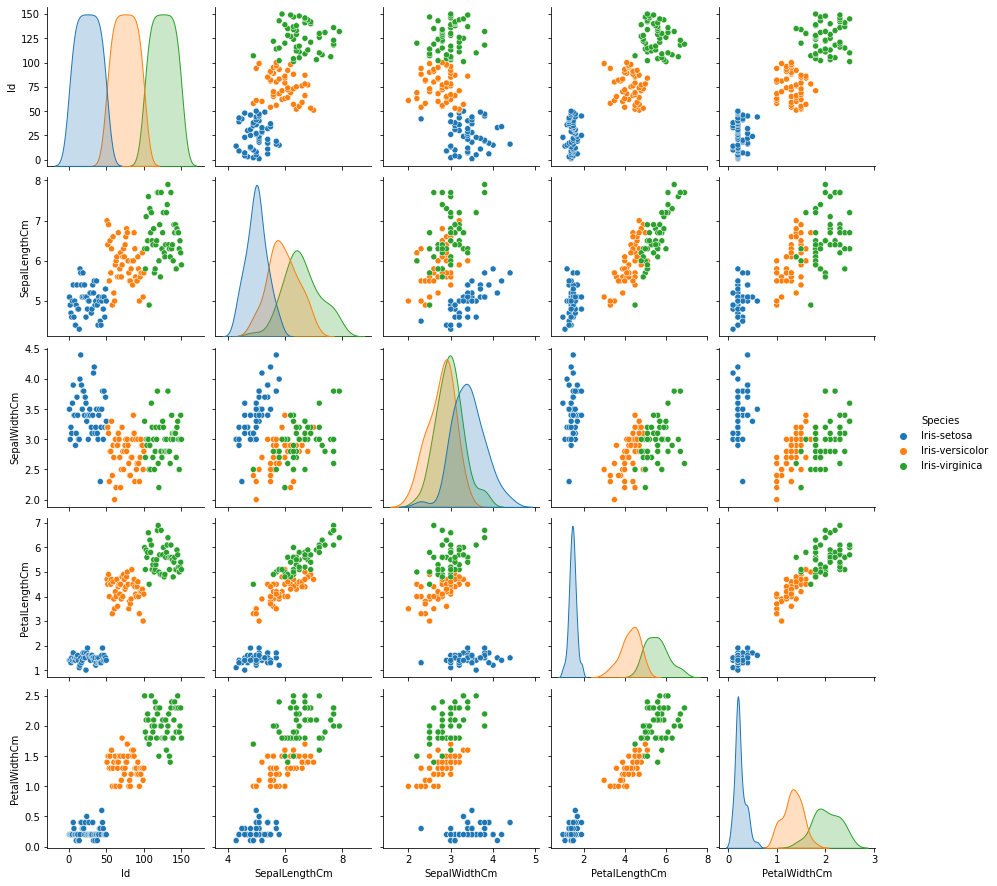

In [49]:
sns.pairplot(data=df, hue="Species")

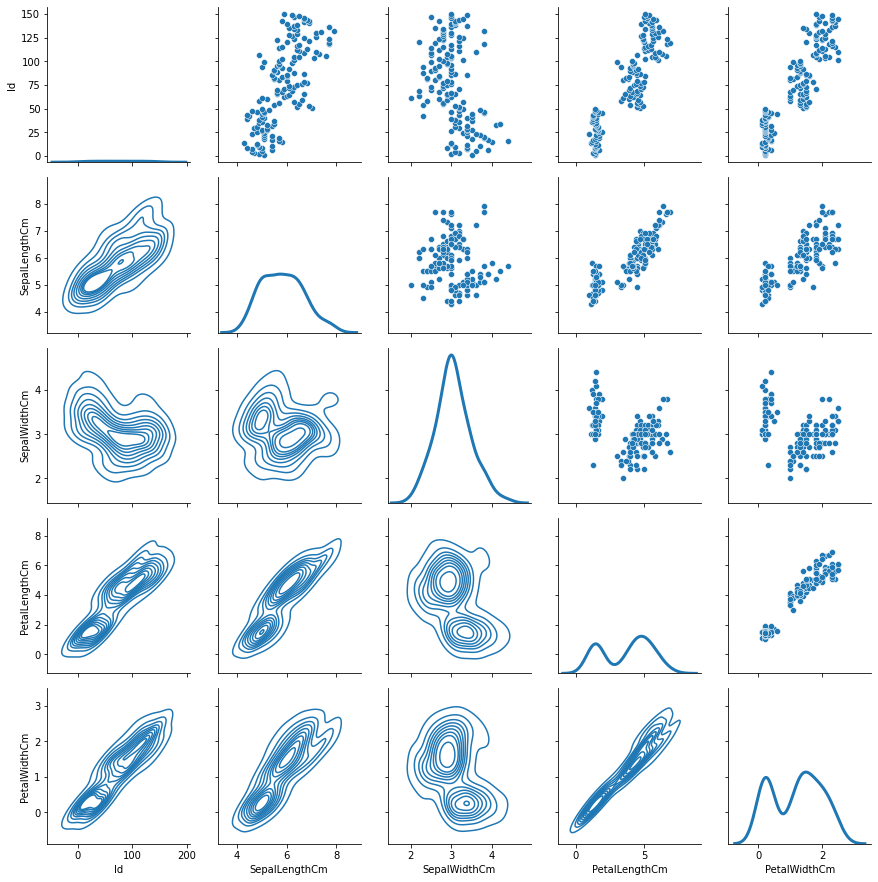

In [50]:
#https://seaborn.pydata.org//tutorial/axis_grids.html
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

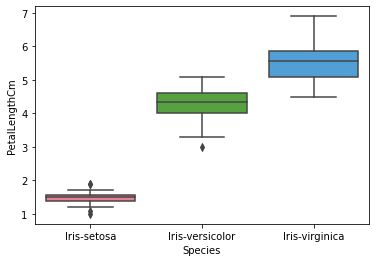

In [56]:
# We can look at an individual feature in Seaborn through mnay different kinds of plots. 
# Here's a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72323030b8>,
      dtype=object)

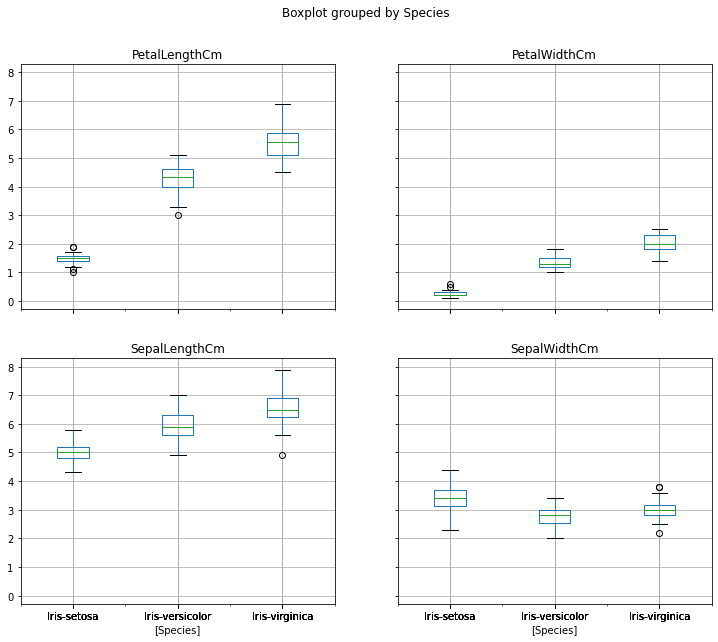

In [58]:
# Now that we've covered seaborn, let's go back to pandas to see what kinds of plots 
# we can make with the pandas library.
# We can quickly make a boxplot with Pandas on each feature split out by species
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 10))

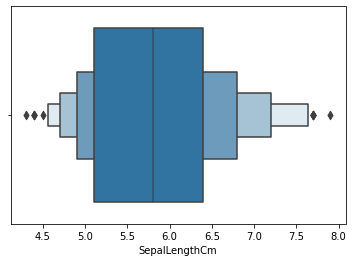

In [66]:
sns.boxenplot(x ="SepalLengthCm", data = df)

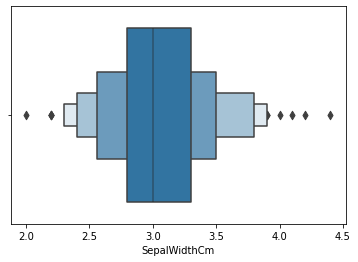

In [63]:
sns.boxenplot(x ="SepalWidthCm", data = df)


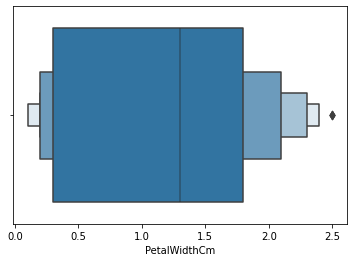

In [64]:
sns.boxenplot(x ="PetalWidthCm", data = df)


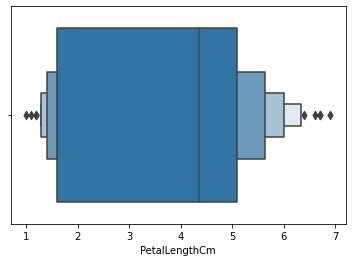

In [67]:
sns.boxenplot(x ="PetalLengthCm", data = df)

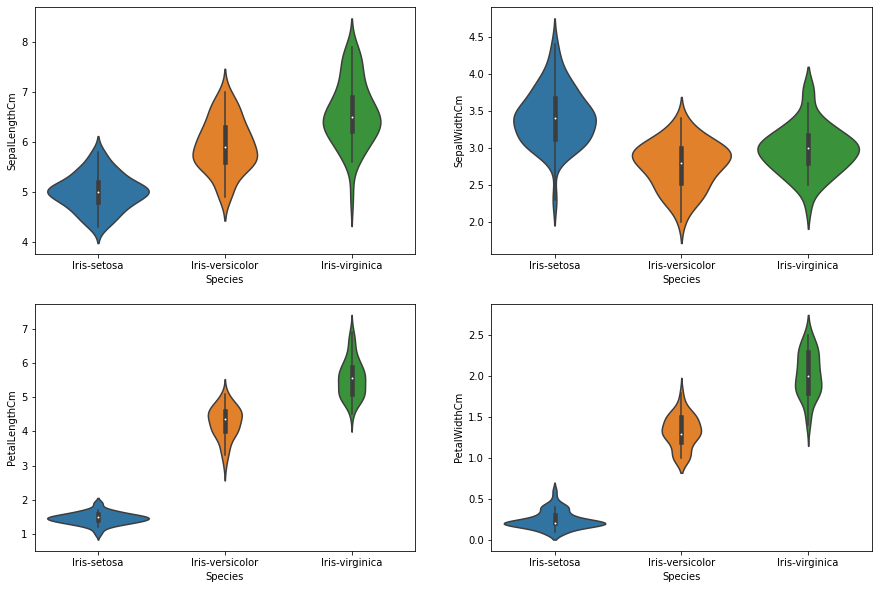

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data = df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data = df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data = df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data = df)

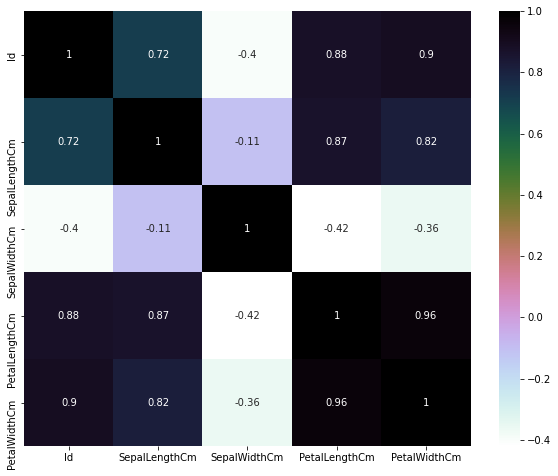

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [73]:
# Now Split the data 
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [74]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [75]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,5.7,2.8,4.5,1.3
33,5.5,4.2,1.4,0.2
126,6.2,2.8,4.8,1.8
78,6.0,2.9,4.5,1.5
129,7.2,3.0,5.8,1.6


In [76]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4
109,7.2,3.6,6.1,2.5
5,5.4,3.9,1.7,0.4


In [77]:
train_y.head()

55     Iris-versicolor
33         Iris-setosa
126     Iris-virginica
78     Iris-versicolor
129     Iris-virginica
Name: Species, dtype: object

In [78]:
test_y.head()

145    Iris-virginica
21        Iris-setosa
31        Iris-setosa
109    Iris-virginica
5         Iris-setosa
Name: Species, dtype: object

**Apply Algorithms**

In [81]:
#Support Vector Machine (SVM)
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


In [82]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


In [84]:
#K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9555555555555556


# **Let us visualize the Decision Tree to understand it better.**


In [87]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
!pip install dtreeviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 204.2MB 74kB/s 
     |████████████████████████████████| 204kB 23.7MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=7dc698101c7e71fd0924e63ce22ea169b2ba71c1b518855f9716cfc7a42aa382
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=70362e24149fc091e26197f2faf1e248c880e8f146b067d3a8397a58fc81a912
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


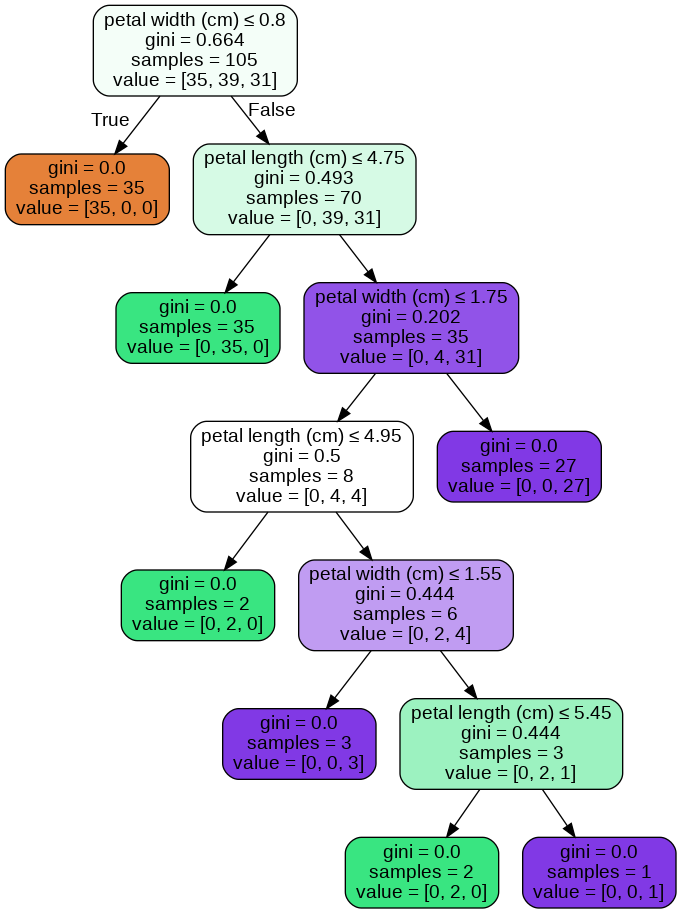

In [92]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [100]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


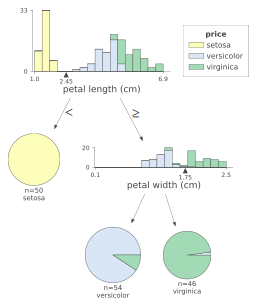

In [108]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default 
viz

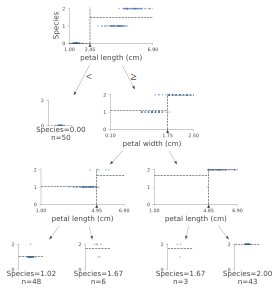

In [109]:
dtreeviz(regr,
       X_train,
       y_train,
       target_name='Species',  # this name will be displayed at the leaf node
       feature_names=iris.feature_names,
       scale=.8
      )

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


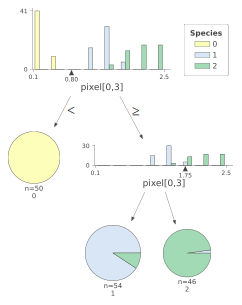

In [112]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

# "8x8 image of integer pixels in the range 0..16."
columns = [f'pixel[{i},{j}]' for i in range(8) for j in range(8)]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='Species',
               feature_names=columns, 
               class_names=[chr(c) for c in range(ord('0'),ord('9')+1)],
               histtype='bar', 
               orientation ='TD')
viz

# END